# Keras Model

### Prepare Image for Model

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("All GPUs: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

All GPUs:  0


In [31]:
#paths
train_path= "./Data/train"
test_path= "./Data/test"
valid_path= "./Data/valid"

In [70]:
#prepare data set 
import os

alphabet= ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',"Space"]
counter=0
for letter in alphabet:
    path= (valid_path + "/" + letter)
    files = os.listdir(path)
    for file in files:
        counter+=1
        print(counter)
        print(file)
        #os.remove(valid_path + "/" + letter +"/" + file)

1
Image_YWSEVJRNR1.jpg
2
Image_YXQQPZ1DYZ.jpg
3
Image_YY0MWBT1ML.jpg
4
Image_Z09P6DE5QC.jpg
5
Image_Z1TOA7N1CQ.jpg
6
Image_ZC3FRABOOI.jpg
7
Image_ZD9SDMZBTM.jpg
8
Image_ZLI93T1CQ0.jpg
9
Image_ZO6MJ884G4.jpg
10
Image_ZV4SJM9DH3.jpg
11
Image_ZHJ7V2GXGH.jpg
12
Image_ZIQ71J3WVP.jpg
13
Image_ZK5JKN7RQA.jpg
14
Image_ZK91I8F2FG.jpg
15
Image_ZK9HOXOAJS.jpg
16
Image_ZMU19KAIPM.jpg
17
Image_ZSF3LGUBVB.jpg
18
Image_ZSFWZAKILF.jpg
19
Image_ZSYBSK4727.jpg
20
Image_ZUDUXUAL47.jpg
21
Image_Y9QKNJHZSJ.jpg
22
Image_YJ5RTCGB7U.jpg
23
Image_YKUGADQJQR.jpg
24
Image_YMFQLXGXE9.jpg
25
Image_YNWQ258NWP.jpg
26
Image_YOKSTBO7QH.jpg
27
Image_YXVEZMMV3W.jpg
28
Image_ZC5G7EK9OP.jpg
29
Image_ZISAPE7NH7.jpg
30
Image_ZRTKJN5VYH.jpg
31
Image_XQIQU84E5T.jpg
32
Image_XU35KXRAQG.jpg
33
Image_XXO097C1N6.jpg
34
Image_YP2X66JFH1.jpg
35
Image_YRS37L4B85.jpg
36
Image_YV2FVI37LL.jpg
37
Image_YWXJOO15Q4.jpg
38
Image_ZDFONYENNB.jpg
39
Image_ZJZ67QO2HS.jpg
40
Image_ZMTCUO33EO.jpg
41
Image_YSEL5EBUFY.jpg
42
Image_YVGJ7GNMJ6.jpg
4

In [21]:
#keras example to filter out fitting images
import os

num_skipped = 0
for folder_name in ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',"Space"):
    folder_path = os.path.join("data/valid", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            print("Deleted path: " + fpath)
            #delete images that are not viable
            os.remove(fpath)

print("End: Deleted %d images" % num_skipped)

Deleted path: data/valid/B/.gitkeep
Deleted path: data/valid/C/.gitkeep
Deleted path: data/valid/D/.gitkeep
Deleted path: data/valid/E/.gitkeep
Deleted path: data/valid/F/.gitkeep
Deleted path: data/valid/H/.gitkeep
Deleted path: data/valid/I/.gitkeep
Deleted path: data/valid/J/.gitkeep
Deleted path: data/valid/L/.gitkeep
Deleted path: data/valid/M/.gitkeep
Deleted path: data/valid/N/.gitkeep
Deleted path: data/valid/O/.gitkeep
Deleted path: data/valid/P/.gitkeep
Deleted path: data/valid/Q/.gitkeep
Deleted path: data/valid/R/.gitkeep
Deleted path: data/valid/S/.gitkeep
Deleted path: data/valid/T/.gitkeep
Deleted path: data/valid/U/.gitkeep
Deleted path: data/valid/V/.gitkeep
Deleted path: data/valid/W/.gitkeep
Deleted path: data/valid/X/.gitkeep
Deleted path: data/valid/Y/.gitkeep
Deleted path: data/valid/Z/.gitkeep
Deleted path: data/valid/Space/.gitkeep
End: Deleted 24 images


In [4]:
lowerAlphabet= ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
upperAlphabet=list(map(lambda x : x.upper(),lowerAlphabet))
upperAlphabet.append("Space")
upperAlphabet

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'Space']

In [106]:
#batches from the data folder -> target_size shrinks down the images 
train_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=upperAlphabet,batch_size=10)
test_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=upperAlphabet,batch_size=10,shuffle=False)
valid_batches= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=upperAlphabet,batch_size=10,shuffle=False)

Found 8106 images belonging to 27 classes.
Found 270 images belonging to 27 classes.
Found 270 images belonging to 27 classes.


In [107]:
assert train_batches.n == 8106
assert valid_batches.n == 270
assert test_batches.n == 270

In [108]:
imgs, labels= next(train_batches)

In [109]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

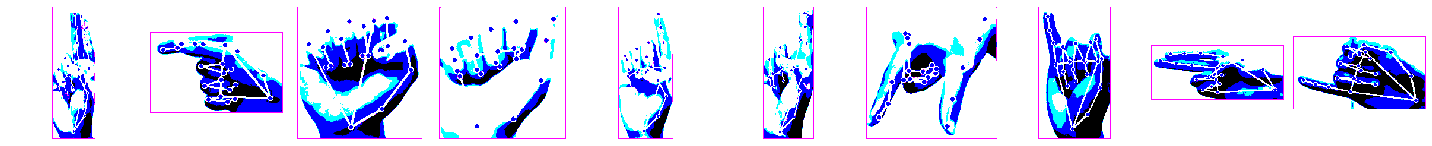

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


In [110]:
plotImages(imgs)
print(labels)

### Build and train Modell- Squential

In [131]:
model= Sequential([
                  Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same",input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2), strides=2),
                  Conv2D(filters=64, kernel_size=(3,3),activation="relu",padding="same"),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Flatten(),
                  Dense(units=27,activation="softmax"),
                  ])

In [132]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 200704)            0         
                                                                 
 dense_10 (Dense)            (None, 27)              

In [133]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [135]:
#epochs=train x times 
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10
811/811 - 558s - loss: 3.3114 - accuracy: 0.9569 - val_loss: 6.5211e-05 - val_accuracy: 1.0000 - 558s/epoch - 689ms/step
Epoch 2/10
811/811 - 410s - loss: 0.0606 - accuracy: 0.9962 - val_loss: 4.5034e-08 - val_accuracy: 1.0000 - 410s/epoch - 506ms/step
Epoch 3/10
811/811 - 324s - loss: 0.0211 - accuracy: 0.9974 - val_loss: 9.2938e-04 - val_accuracy: 1.0000 - 324s/epoch - 399ms/step
Epoch 4/10
811/811 - 272s - loss: 0.0726 - accuracy: 0.9952 - val_loss: 1.5876e-05 - val_accuracy: 1.0000 - 272s/epoch - 335ms/step
Epoch 5/10
811/811 - 278s - loss: 0.0295 - accuracy: 0.9983 - val_loss: 3.8127e-05 - val_accuracy: 1.0000 - 278s/epoch - 342ms/step
Epoch 6/10
811/811 - 271s - loss: 0.0033 - accuracy: 0.9999 - val_loss: 2.1661e-05 - val_accuracy: 1.0000 - 271s/epoch - 334ms/step
Epoch 7/10
811/811 - 267s - loss: 5.2723e-06 - accuracy: 1.0000 - val_loss: 1.3404e-05 - val_accuracy: 1.0000 - 267s/epoch - 330ms/step
Epoch 8/10
811/811 - 300s - loss: 3.0098e-06 - accuracy: 1.0000 - val_lo

## testing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

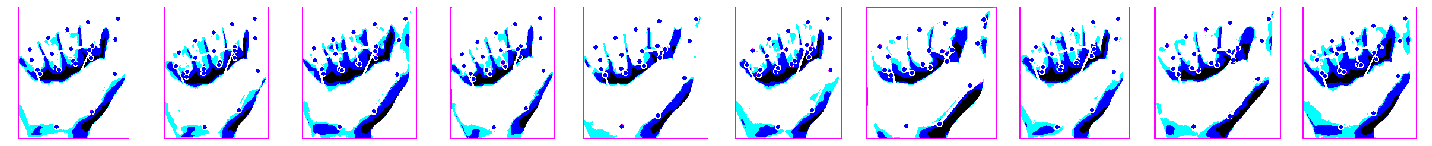

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


In [136]:
test_imgs, test_labels= next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [137]:
test_batches.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [140]:
predictions=model.predict(x=test_batches,verbose=0)

In [141]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [143]:
#confusion matrix
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [144]:
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, 
               interpolation='nearest', 
               cmap=cmap)

    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

In [145]:
test_batches.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'Space': 26}

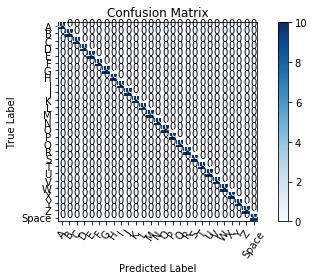

In [147]:
#check if model predicts correctly
cm_plot_labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',"Space"]
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title="Confusion Matrix")

In [149]:
#model.save('./')